<a href="https://colab.research.google.com/github/Adil1979/P6_Tag_Recommendation_Stackoverflow/blob/master/02_Supervised_Modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet6: Catégorisation automatique de questions**

## **1.Librairies**

In [1]:
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib as mpl
#import chart_studio.plotly.plotly as py
from collections import Counter
#import plotly.plotly as py
import seaborn as sns
import datetime as dt
import calendar as cld
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA
from matplotlib import dates
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import string
from collections import Counter
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from ast import literal_eval
random_state = 747

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## **2.Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_mod = pd.read_csv('/content/drive/My Drive/CentraleSupelec_OCR/P6/df_sample_list.csv')
df_mod = df_mod.iloc[:, 1:]
df_mod.head()

,Question,Question_Tokens,Tags
0,pandas finding elements columns pandas element...,"['panda', 'finding', 'element', 'column', 'pan...","['python', 'pandas']"
1,php haystack contains needle assuming works pr...,"['php', 'haystack', 'contains', 'needle', 'ass...",['php']
2,understanding json agg performance postgres 9 ...,"['understanding', 'json', 'agg', 'performance'...","['performance', 'postgresql']"
3,java main thread waits child thread finish sim...,"['java', 'main', 'thread', 'wait', 'child', 't...","['java', 'multithreading']"
4,stream live video browser low latency want str...,"['stream', 'live', 'video', 'browser', 'low', ...","['flash', 'video', 'stream', 'live']"


In [6]:
def to_list(df,column):
  df[column] = df[column].apply(literal_eval)
  return df

In [7]:
df_mod_list = to_list(df_mod, 'Tags')
df_mod_list = to_list(df_mod, 'Question_Tokens')

In [8]:
df_mod_list.head()

,Question,Question_Tokens,Tags
0,pandas finding elements columns pandas element...,"[panda, finding, element, column, panda, eleme...","[python, pandas]"
1,php haystack contains needle assuming works pr...,"[php, haystack, contains, needle, assuming, wo...",[php]
2,understanding json agg performance postgres 9 ...,"[understanding, json, agg, performance, postgr...","[performance, postgresql]"
3,java main thread waits child thread finish sim...,"[java, main, thread, wait, child, thread, fini...","[java, multithreading]"
4,stream live video browser low latency want str...,"[stream, live, video, browser, low, latency, w...","[flash, video, stream, live]"


In [9]:
tags0 = df_mod_list['Tags']
question0 = df_mod_list['Question_Tokens']

In [10]:
tag_count = nltk.Counter()
for bloc in tags0:
  tag_count.update([word for word in bloc])
print(len(tag_count))
tag_500 = tag_count.most_common(500)
tag_500

13406


[('java', 3408),
 ('c#', 3395),
 ('python', 3393),
 ('javascript', 3183),
 ('android', 2443),
 ('c++', 1949),
 ('php', 1625),
 ('html', 1322),
 ('ios', 1262),
 ('jquery', 1211),
 ('.net', 1201),
 ('css', 1102),
 ('c', 789),
 ('r', 788),
 ('sql', 748),
 ('mysql', 715),
 ('asp.net', 692),
 ('ruby-on-rails', 631),
 ('objective-c', 620),
 ('node.js', 603),
 ('iphone', 557),
 ('angular', 542),
 ('swift', 528),
 ('sql-server', 521),
 ('django', 490),
 ('reactjs', 485),
 ('ruby', 482),
 ('linux', 478),
 ('arrays', 433),
 ('git', 424),
 ('regex', 417),
 ('asp.net-mvc', 417),
 ('windows', 408),
 ('wpf', 403),
 ('python-3.x', 401),
 ('pandas', 387),
 ('json', 385),
 ('spring', 380),
 ('performance', 351),
 ('string', 342),
 ('multithreading', 336),
 ('algorithm', 336),
 ('typescript', 331),
 ('xml', 328),
 ('xcode', 316),
 ('angularjs', 316),
 ('visual-studio', 310),
 ('database', 310),
 ('scala', 307),
 ('macos', 302),
 ('eclipse', 282),
 ('bash', 282),
 ('unit-testing', 270),
 ('postgresql', 2

In [13]:
most_common_tags = [i for i, j in tag_count.items() if j > 33]
len(most_common_tags)

502

In [14]:
from collections import defaultdict

dict_tag_500 = defaultdict(int)
for x in tag_500:
    dict_tag_500[x[0]] += x[1]
dict_tag_500

defaultdict(int,
            {'.htaccess': 43,
             '.net': 1201,
             '.net-3.5': 41,
             '.net-core': 88,
             'actionscript-3': 40,
             'activerecord': 66,
             'ajax': 227,
             'algorithm': 336,
             'amazon-ec2': 69,
             'amazon-s3': 87,
             'amazon-web-services': 256,
             'android': 2443,
             'android-activity': 44,
             'android-emulator': 42,
             'android-fragments': 78,
             'android-gradle-plugin': 43,
             'android-intent': 65,
             'android-layout': 106,
             'android-studio': 158,
             'angular': 542,
             'angular-material': 42,
             'angular5': 37,
             'angularjs': 316,
             'animation': 69,
             'ansible': 37,
             'ant': 36,
             'apache': 131,
             'apache-kafka': 51,
             'apache-spark': 144,
             'apache-spark-sql': 34,
         

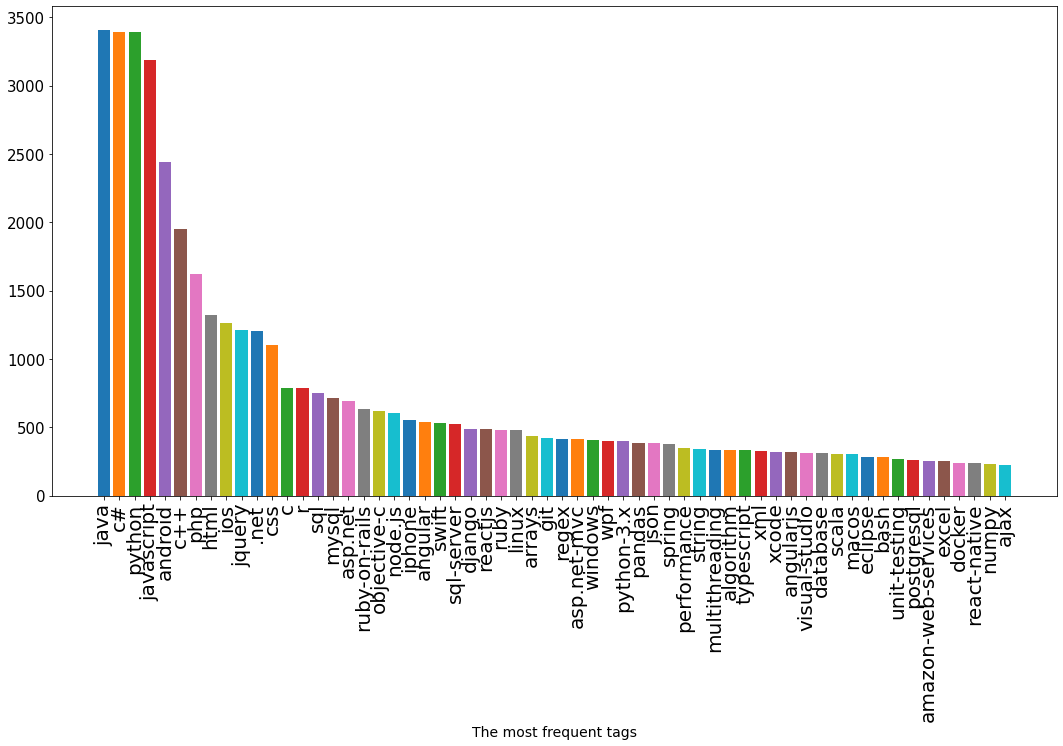

In [15]:
fig, ax = plt.subplots(figsize=(18, 9))


ax.set_xlabel('The most frequent tags', fontsize=14)
ax.bar(x=np.arange(60), 
       height=[x[1] for x in tag_count.most_common(60)],
       tick_label=[x[0] for x in tag_count.most_common(60)],
       color=plt.cm.get_cmap('tab10').colors)

plt.yticks(size=15)
plt.xticks(rotation='vertical', size=20)
plt.show()

In [16]:
def ListeToString(s):
  str1 = " "
  return (str1.join(s))

In [17]:
df_mod_list['Tag_st'] = df_mod_list['Tags'].apply(ListeToString)

In [18]:
df_mod_list.head()

,Question,Question_Tokens,Tags,Tag_st
0,pandas finding elements columns pandas element...,"[panda, finding, element, column, panda, eleme...","[python, pandas]",python pandas
1,php haystack contains needle assuming works pr...,"[php, haystack, contains, needle, assuming, wo...",[php],php
2,understanding json agg performance postgres 9 ...,"[understanding, json, agg, performance, postgr...","[performance, postgresql]",performance postgresql
3,java main thread waits child thread finish sim...,"[java, main, thread, wait, child, thread, fini...","[java, multithreading]",java multithreading
4,stream live video browser low latency want str...,"[stream, live, video, browser, low, latency, w...","[flash, video, stream, live]",flash video stream live


In [19]:
df_mod_list_st = df_mod_list[['Question', 'Tag_st', 'Question_Tokens', 'Tags']]
df_mod_list_st.head()

,Question,Tag_st,Question_Tokens,Tags
0,pandas finding elements columns pandas element...,python pandas,"[panda, finding, element, column, panda, eleme...","[python, pandas]"
1,php haystack contains needle assuming works pr...,php,"[php, haystack, contains, needle, assuming, wo...",[php]
2,understanding json agg performance postgres 9 ...,performance postgresql,"[understanding, json, agg, performance, postgr...","[performance, postgresql]"
3,java main thread waits child thread finish sim...,java multithreading,"[java, main, thread, wait, child, thread, fini...","[java, multithreading]"
4,stream live video browser low latency want str...,flash video stream live,"[stream, live, video, browser, low, latency, w...","[flash, video, stream, live]"


In [20]:
tags1 = df_mod_list_st['Tag_st']
questions1  = df_mod_list_st['Question']

In [21]:
tags1

0                      python pandas
1                                php
2             performance postgresql
3                java multithreading
4            flash video stream live
                    ...             
39995            scala intellij-idea
39996                   dart flutter
39997          reactjs webpack redux
39998                 python twitter
39999    .net linq wcf-data-services
Name: Tag_st, Length: 40000, dtype: object

In [22]:
questions1.head()

0    pandas finding elements columns pandas element...
1    php haystack contains needle assuming works pr...
2    understanding json agg performance postgres 9 ...
3    java main thread waits child thread finish sim...
4    stream live video browser low latency want str...
Name: Question, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
list_tag_key_500 = set(dict_tag_500.keys())
list_tag_key_500

{'.htaccess',
 '.net',
 '.net-3.5',
 '.net-core',
 'actionscript-3',
 'activerecord',
 'ajax',
 'algorithm',
 'amazon-ec2',
 'amazon-s3',
 'amazon-web-services',
 'android',
 'android-activity',
 'android-emulator',
 'android-fragments',
 'android-gradle-plugin',
 'android-intent',
 'android-layout',
 'android-studio',
 'angular',
 'angular-material',
 'angular5',
 'angularjs',
 'animation',
 'ansible',
 'ant',
 'apache',
 'apache-kafka',
 'apache-spark',
 'apache-spark-sql',
 'api',
 'architecture',
 'arraylist',
 'arrays',
 'asp.net',
 'asp.net-core',
 'asp.net-core-2.0',
 'asp.net-core-mvc',
 'asp.net-mvc',
 'asp.net-mvc-2',
 'asp.net-mvc-3',
 'asp.net-mvc-4',
 'asp.net-web-api',
 'assembly',
 'async-await',
 'asynchronous',
 'audio',
 'authentication',
 'autocomplete',
 'awk',
 'aws-lambda',
 'azure',
 'bash',
 'batch-file',
 'binary',
 'binding',
 'boost',
 'bootstrap-4',
 'browser',
 'build',
 'button',
 'c',
 'c#',
 'c++',
 'c++11',
 'c++14',
 'c++17',
 'caching',
 'cakephp',
 '

In [25]:
from joblib import dump
dump(list_tag_key_500, 'list_tag_key_500.joblib')

['list_tag_key_500.joblib']

In [26]:
def keep_tags(text):
    text = str(text)
    text = " ".join(tag for tag in text.split() if tag in list_tag_key_500  )
    return text

In [27]:
questions1 = questions1.apply(keep_tags)
questions1

0                      pandas pandas list dataframe object
1                                               php string
2        json performance json function select json joi...
3        java java class class static string join join ...
4        stream video browser stream video browser vide...
                               ...                        
39995    scala scala configuration module java scala ty...
39996      flutter function button build function function
39997    routing url browser class import dom class con...
39998    python post twitter post python import import ...
39999                linq build linq select linq recursion
Name: Question, Length: 40000, dtype: object

In [28]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import EnglishStemmer
lemma = WordNetLemmatizer().lemmatize

In [29]:
def tokenize(document):
  tokens = [lemma(w) for w in document.split()] #if w.isalpha()]
  return tokens

In [30]:
stop_words = set(stopwords.words('english'))

In [42]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = stop_words, max_features=500)
X_tfidf = vectorizer.fit_transform(questions1).toarray() #.toarray à supprimer pour 
#X_train_tfidf = vectorizer.fit_transform(X_train).toarray() 
#X_test_tfidf = vectorizer.fit_transform(X_test).toarray()
#print('Total words: ', len(vectorizer.vocabulary))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [43]:
print(X_tfidf.shape)

(40000, 355)


In [51]:
feature_names = vectorizer.get_feature_names()
print(feature_names)

['activerecord', 'ajax', 'algorithm', 'android', 'angular', 'angular5', 'angularjs', 'animation', 'ansible', 'ant', 'apache', 'api', 'architecture', 'array', 'arraylist', 'assembly', 'asynchronous', 'audio', 'authentication', 'autocomplete', 'awk', 'azure', 'bash', 'binary', 'binding', 'boost', 'browser', 'build', 'button', 'c', 'c++', 'c++11', 'c++14', 'c++17', 'caching', 'cakephp', 'canvas', 'casting', 'chart', 'checkbox', 'clang', 'class', 'clojure', 'closure', 'cmake', 'cocoa', 'codeigniter', 'coldfusion', 'collection', 'color', 'compilation', 'concurrency', 'configuration', 'constant', 'constructor', 'control', 'cooky', 'cordova', 'cs', 'csv', 'curl', 'dart', 'database', 'dataframe', 'date', 'datetime', 'debugging', 'delphi', 'deployment', 'devise', 'dictionary', 'django', 'dll', 'dns', 'docker', 'dockerfile', 'dom', 'dplyr', 'drupal', 'dynamic', 'eclipse', 'elasticsearch', 'emacs', 'email', 'encoding', 'encryption', 'enums', 'erlang', 'event', 'excel', 'exception', 'express', 'fa

In [45]:
vectorizer.vocabulary_.items()

dict_items([('panda', 218), ('list', 171), ('dataframe', 63), ('object', 210), ('php', 226), ('string', 297), ('json', 156), ('performance', 223), ('function', 106), ('select', 271), ('join', 152), ('date', 64), ('time', 312), ('loop', 175), ('set', 277), ('java', 146), ('class', 41), ('static', 293), ('security', 269), ('exception', 90), ('jvm', 160), ('stream', 296), ('video', 332), ('browser', 26), ('flash', 98), ('http', 124), ('file', 94), ('javascript', 148), ('input', 133), ('web', 336), ('indexing', 130), ('dns', 73), ('ide', 125), ('constant', 53), ('reflection', 252), ('c', 29), ('c++', 30), ('method', 190), ('process', 234), ('jquery', 154), ('linux', 169), ('database', 62), ('caching', 34), ('reference', 251), ('api', 11), ('mysql', 201), ('text', 310), ('button', 28), ('selenium', 272), ('firefox', 97), ('r', 241), ('null', 207), ('import', 129), ('module', 195), ('python', 239), ('post', 231), ('pip', 227), ('build', 27), ('search', 268), ('regex', 253), ('path', 221), ('

### **TF-IDF Weights**

In [35]:
#get word frequencies and create wordcloud
#tfidf_weights = [(word, X_tfidf.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [36]:
#type(tfidf_weights)

list

In [37]:
#tfidf_weights[0:10]

[('panda', 160.56304610299517),
 ('list', 1318.5889318372992),
 ('dataframe', 206.86748972193197),
 ('object', 1156.0186464504518),
 ('php', 672.6537084976823),
 ('string', 1825.9567643521632),
 ('json', 581.7886101176459),
 ('performance', 275.40860687816894),
 ('function', 1853.5934521792378),
 ('select', 812.262289040702)]

In [38]:
#import pickle

#with open("list_tfidf_weights.txt", "wb") as fp:  #Pickling
  #pickle.dump(tfidf_weights , fp)

In [39]:
#with open("list_tfidf_weights.txt", "rb") as fp: # Unpickling
  #list_tfidf_weights = pickle.load(fp)
list_tfidf_weights = pd.read_pickle("/content/drive/My Drive/CentraleSupelec_OCR/P6/list_tfidf_weights.txt")
list_tfidf_weights[0:10]

[('panda', 160.56304610299517),
 ('list', 1318.5889318372992),
 ('dataframe', 206.86748972193197),
 ('object', 1156.0186464504518),
 ('php', 672.6537084976823),
 ('string', 1825.9567643521632),
 ('json', 581.7886101176459),
 ('performance', 275.40860687816894),
 ('function', 1853.5934521792378),
 ('select', 812.262289040702)]

### **WordCloud**

In [40]:
from wordcloud import WordCloud
w = WordCloud(width=1500,height=1200,mode='RGBA',background_color='white',max_words=500).fit_words(dict(list_tfidf_weights))

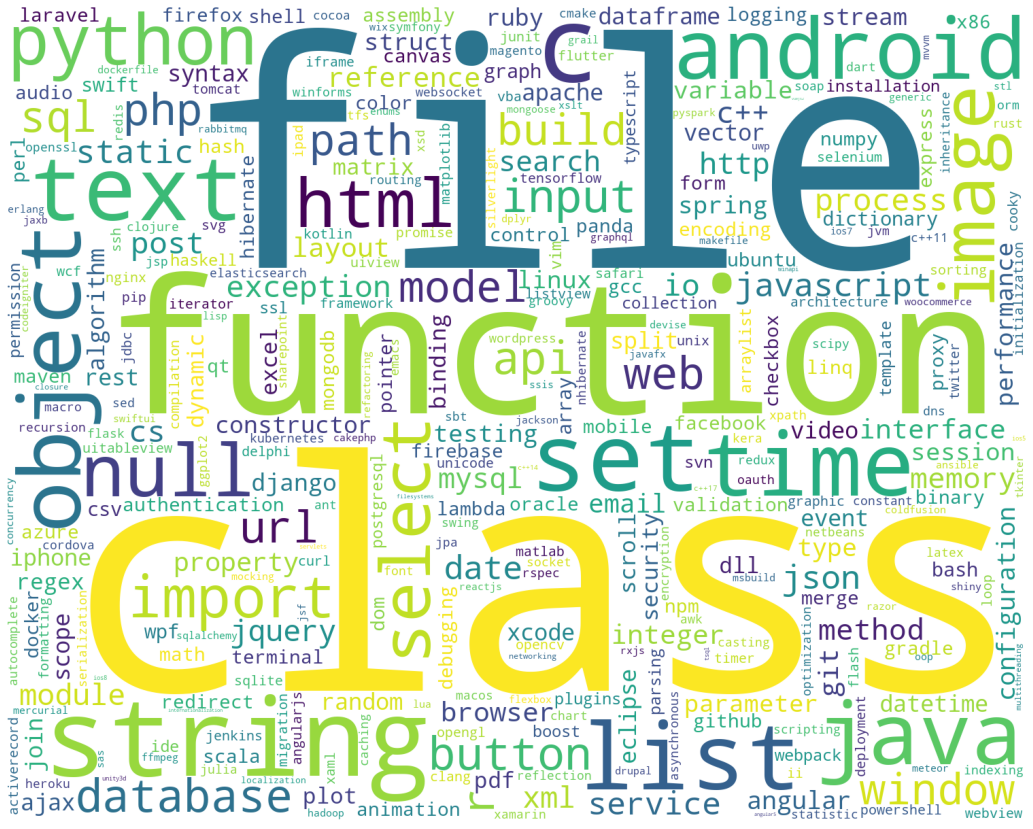

In [41]:
# all below in a single cell
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')

In [46]:
X_tfidf = pd.DataFrame(X_tfidf)
X_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43769,0.0,0.0,0.0,0.050286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
questions_value = vectorizer.vocabulary_

In [48]:
questions_value_df = pd.DataFrame(questions_value.items(), columns=['word', 'value'])
questions_value_df.head()

,word,value
0,panda,218
1,list,171
2,dataframe,63
3,object,210
4,php,226


In [52]:
X_tfidf.columns = feature_names
X_tfidf.head()

,activerecord,ajax,algorithm,android,angular,angular5,angularjs,animation,ansible,ant,apache,api,architecture,array,arraylist,assembly,asynchronous,audio,authentication,autocomplete,awk,azure,bash,binary,binding,boost,browser,build,button,c,c++,c++11,c++14,c++17,caching,cakephp,canvas,casting,chart,checkbox,...,tomcat,tsql,twitter,type,typescript,ubuntu,uitableview,uiview,unicode,unity3d,unix,url,uwp,validation,variable,vba,vector,video,vim,vuejs2,wcf,web,webpack,websocket,webview,winapi,window,winforms,wix,woocommerce,wordpress,wpf,x86,xamarin,xaml,xcode,xml,xpath,xsd,xslt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43769,0.0,0.0,0.0,0.050286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(list_tag_key_500))
df_tags_num = mlb.fit_transform(df_mod_list_st['Tags'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['.class-file', '.d.ts', '.emf', '.net-1.1', '.net-2.0', '.net-4.0', '.net-4.5', '.net-4.5.2', '.net-4.6', '.net-4.7', '.net-4.7.1', '.net-4.7.2', '.net-assembly', '.net-core-2.0', '.net-core-2.1', '.net-core-3.0', '.net-core-3.1', '.net-framework-version', '.net-reflector', '.net-standard', '.net-standard-2.0', '2-satisfiability', '256color', '2d', '2d-3d-conversion', '2dsphere', '32-bit', '32bit-64bit', '360-degrees', '360-virtual-reality', '3d', '3d-engine', '3d-model', '3g', '4d', '51degrees', '64-bit', '6502', '68000', '7zip', 'a-records', 'a-star', 'aaa-security-protocol', 'aabb', 'aac', 'aapt', 'aar', 'ab-testing', 'abac', 'abaddressbook', 'abap', 'abaqus', 'abbreviation', 'abc', 'abcpdf', 'abi', 'abort', 'abpeoplepickerview', 'absolute', 'absolute-path', 'absolute-value', 'abstract', 'abstract-base-class', 'abstract-class', 'abstract-data-type', 'abstract-methods', 'abstra

In [54]:
df_tags_num.shape

(40000, 500)

In [55]:
df_tags_num

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [56]:
mlb.classes_

array(['.htaccess', '.net', '.net-3.5', '.net-core', 'actionscript-3',
       'activerecord', 'ajax', 'algorithm', 'amazon-ec2', 'amazon-s3',
       'amazon-web-services', 'android', 'android-activity',
       'android-emulator', 'android-fragments', 'android-gradle-plugin',
       'android-intent', 'android-layout', 'android-studio', 'angular',
       'angular-material', 'angular5', 'angularjs', 'animation',
       'ansible', 'ant', 'apache', 'apache-kafka', 'apache-spark',
       'apache-spark-sql', 'api', 'architecture', 'arraylist', 'arrays',
       'asp.net', 'asp.net-core', 'asp.net-core-2.0', 'asp.net-core-mvc',
       'asp.net-mvc', 'asp.net-mvc-2', 'asp.net-mvc-3', 'asp.net-mvc-4',
       'asp.net-web-api', 'assembly', 'async-await', 'asynchronous',
       'audio', 'authentication', 'autocomplete', 'awk', 'aws-lambda',
       'azure', 'bash', 'batch-file', 'binary', 'binding', 'boost',
       'bootstrap-4', 'browser', 'build', 'button', 'c', 'c#', 'c++',
       'c++11', 'c++14

In [57]:
y_tags = pd.DataFrame(df_tags_num, columns=mlb.classes_)
y_tags.head()

,.htaccess,.net,.net-3.5,.net-core,actionscript-3,activerecord,ajax,algorithm,amazon-ec2,amazon-s3,amazon-web-services,android,android-activity,android-emulator,android-fragments,android-gradle-plugin,android-intent,android-layout,android-studio,angular,angular-material,angular5,angularjs,animation,ansible,ant,apache,apache-kafka,apache-spark,apache-spark-sql,api,architecture,arraylist,arrays,asp.net,asp.net-core,asp.net-core-2.0,asp.net-core-mvc,asp.net-mvc,asp.net-mvc-2,...,vba,vector,version-control,video,vim,visual-c++,visual-studio,visual-studio-2008,visual-studio-2010,visual-studio-2012,visual-studio-2015,visual-studio-2017,visual-studio-code,vue.js,vuejs2,wcf,web,web-applications,web-services,webpack,websocket,webview,winapi,windows,windows-7,winforms,wix,woocommerce,wordpress,wpf,x86,xamarin,xamarin.forms,xaml,xcode,xml,xpath,xsd,xslt,zend-framework
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
X_questions = X_tfidf
X_questions.head()

,activerecord,ajax,algorithm,android,angular,angular5,angularjs,animation,ansible,ant,apache,api,architecture,array,arraylist,assembly,asynchronous,audio,authentication,autocomplete,awk,azure,bash,binary,binding,boost,browser,build,button,c,c++,c++11,c++14,c++17,caching,cakephp,canvas,casting,chart,checkbox,...,tomcat,tsql,twitter,type,typescript,ubuntu,uitableview,uiview,unicode,unity3d,unix,url,uwp,validation,variable,vba,vector,video,vim,vuejs2,wcf,web,webpack,websocket,webview,winapi,window,winforms,wix,woocommerce,wordpress,wpf,x86,xamarin,xaml,xcode,xml,xpath,xsd,xslt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43769,0.0,0.0,0.0,0.050286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **3.Modelisation**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_similarity_score, make_scorer
from sklearn.pipeline import Pipeline

### **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_questions, y_tags,
                                                    test_size=0.3, 
                                                    random_state=random_state)

In [ ]:
X_train.head()

,static,function,struct,mongodb,object,api,date,laravel,post,text,input,kera,module,dataframe,panda,c,list,random,filter,class,html,java,tensorflow,numpy,seaborn,matplotlib,python,logging,csv,validation,iterator,lambda,graph,plot,collection,generator,regex,nginx,php,linux,...,mocking,excel,plotly,shiny,woocommerce,apollo,jasmine,blazor,tuples,xaml,generic,tsql,hive,ssis,vectorization,inheritance,swagger,tkinter,hibernate,winforms,elixir,cypress,hadoop,opengl,nlp,mockito,uwp,lstm,msbuild,keycloak,delphi,ansible,socket,gatsby,oop,cocoapods,winapi,raku,yarnpkg,jestjs
15114,0.0,0.0,0.0,0.0,0.234308,0.400446,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206208,0.291883,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.711095,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27789,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9638,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316420,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22907,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.441367,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20646,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.078072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.047569,0.0,0.908086,0.0,0.0,0.057032,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.268781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

,.net,.net-core,aggregation-framework,airflow,ajax,algorithm,amazon-cloudformation,amazon-cognito,amazon-dynamodb,amazon-ec2,amazon-s3,amazon-web-services,anaconda,android,android-architecture-components,android-constraintlayout,android-fragments,android-gradle-plugin,android-jetpack,android-layout,android-livedata,android-recyclerview,android-room,android-studio,androidx,angular,angular-cli,angular-material,angular-material2,angular5,angular6,angular7,angularjs,animation,annotations,ansible,apache,apache-kafka,apache-spark,apache-spark-sql,...,variables,vb.net,vba,vector,vectorization,video,vim,visual-c++,visual-studio,visual-studio-2017,visual-studio-2019,visual-studio-code,vscode-settings,vue-component,vue.js,vuejs2,vuetify.js,vuex,web,web-scraping,webpack,websocket,webview,winapi,windows,windows-10,winforms,woocommerce,wordpress,wpf,x86,xamarin,xamarin.android,xamarin.forms,xaml,xcode,xcode11,xml,yaml,yarnpkg
15114,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **OneVsRestClass and GridSearchCV**

### **Logistic Regression**

In [ ]:
lr_model = OneVsRestClassifier(LogisticRegression())
jss_score = make_scorer(jaccard_similarity_score)
lr_hyperparameters = dict(estimator__C=[10**-1, 10**2, 10**3], estimator__penalty=['l1', 'l2'])
lr_cv = GridSearchCV(lr_model, lr_hyperparameters, cv=5, n_jobs = -1, scoring= jss_score)

In [ ]:
lr_cv.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                                                                        random_state=None

In [ ]:
lr_cv.best_params_

{'estimator__C': 100, 'estimator__penalty': 'l2'}

In [ ]:
lr_cv.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.34624226190476187

In [ ]:
y_pred = lr_cv.predict(X_test)
lr_jss_score = jaccard_similarity_score(y_test, y_pred)
print(f"Score: {lr_jss_score}")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Score: 0.34624226190476187


In [ ]:
pd.concat([pd.Series(mlb.inverse_transform(y_pred), name='y_pred'),
           pd.Series(mlb.inverse_transform(y_test.to_numpy()), name='y_true')], axis=1)

,y_pred,y_true
0,"(regex,)","(java, regex)"
1,"(regex,)","(.net, c#, regex)"
2,"(android, firebase)","(android, gradle)"
3,"(java, spring-boot)","(hibernate, jpa, spring-boot)"
4,(),"(postgresql, sql)"
...,...,...
11995,"(anaconda, python)","(conda, python, visual-studio-code)"
11996,(),"(bash, sed)"
11997,"(firebase, google-cloud-functions)","(google-cloud-functions, javascript, node.js)"
11998,(),"(git, visual-studio-code)"


In [ ]:
from joblib import dump, load

In [ ]:
dump(lr_cv, 'reg_log_saved.joblib')

['reg_log_saved.joblib']

### **Decision Tree**

In [ ]:
dt_model = Pipeline([('dt', OneVsRestClassifier(estimator = DecisionTreeClassifier()))])
dt_hyperparameters = {'dt__estimator__min_samples_split':[10, 20, 40], 
                   'dt__estimator__min_samples_leaf': [0.05, 0.1, 0.2], 
                   'dt__estimator__criterion':['gini', 'entropy']}

dt_cv = GridSearchCV(dt_model, dt_hyperparameters, scoring=jss_score, cv=5, n_jobs = -1)                   

In [ ]:
sorted(dt_model.get_params().keys())

['dt',
 'dt__estimator',
 'dt__estimator__ccp_alpha',
 'dt__estimator__class_weight',
 'dt__estimator__criterion',
 'dt__estimator__max_depth',
 'dt__estimator__max_features',
 'dt__estimator__max_leaf_nodes',
 'dt__estimator__min_impurity_decrease',
 'dt__estimator__min_impurity_split',
 'dt__estimator__min_samples_leaf',
 'dt__estimator__min_samples_split',
 'dt__estimator__min_weight_fraction_leaf',
 'dt__estimator__presort',
 'dt__estimator__random_state',
 'dt__estimator__splitter',
 'dt__n_jobs',
 'memory',
 'steps',
 'verbose']

In [ ]:
dt_cv.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dt',
                                        OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                             class_weight=None,
                                                                                             criterion='gini',
                                                                                             max_depth=None,
                                                                                             max_features=None,
                                                                                             max_leaf_nodes=None,
                                                                                             min_impurity_decrease=0.0,
                                                                                       

In [ ]:
dt_cv.best_params_

{'dt__estimator__criterion': 'entropy',
 'dt__estimator__min_samples_leaf': 0.05,
 'dt__estimator__min_samples_split': 10}

In [ ]:
dt_cv.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.11942638888888887

In [ ]:
y_pred = dt_cv.predict(X_test)
dt_jss_score = jaccard_similarity_score(y_test, y_pred)
print(f"Score: {dt_jss_score}")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Score: 0.11942638888888887


In [ ]:
pd.concat([pd.Series(mlb.inverse_transform(y_pred), name='y_pred'),
           pd.Series(mlb.inverse_transform(y_test.to_numpy()), name='y_true')], axis=1)

,y_pred,y_true
0,(),"(java, regex)"
1,(),"(.net, c#, regex)"
2,"(android, java)","(android, gradle)"
3,(),"(hibernate, jpa, spring-boot)"
4,(),"(postgresql, sql)"
...,...,...
11995,"(python,)","(conda, python, visual-studio-code)"
11996,(),"(bash, sed)"
11997,(),"(google-cloud-functions, javascript, node.js)"
11998,(),"(git, visual-studio-code)"


In [ ]:
dump(dt_cv, 'Dec_Tree_saved.joblib')

['Dec_Tree_saved.joblib']

### **Naive Bayes**

In [ ]:
nb_model = Pipeline([('nb', OneVsRestClassifier(estimator = MultinomialNB()))])
nb_hyperparameters = {'nb__estimator__alpha': [0.01, 0.1, 1]}   

nb_cv = GridSearchCV(nb_model, nb_hyperparameters, scoring=jss_score, cv=5, n_jobs = -1)      

In [ ]:
sorted(nb_model.get_params().keys())

['memory',
 'nb',
 'nb__estimator',
 'nb__estimator__alpha',
 'nb__estimator__class_prior',
 'nb__estimator__fit_prior',
 'nb__n_jobs',
 'steps',
 'verbose']

In [ ]:
nb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('nb',
                                        OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0,
                                                                                    class_prior=None,
                                                                                    fit_prior=True),
                                                            n_jobs=None))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'nb__estimator__alpha': [0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(jaccard_similarity_score), verbose=0)

In [ ]:
nb_cv.best_params_

{'nb__estimator__alpha': 0.01}

In [ ]:
nb_cv.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.24511111111111109

In [ ]:
y_pred = nb_cv.predict(X_test)
nb_jss_score = jaccard_similarity_score(y_test, y_pred)
print(f"Score: {nb_jss_score}")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Score: 0.24511111111111109


In [ ]:
pd.concat([pd.Series(mlb.inverse_transform(y_pred), name='y_pred'),
           pd.Series(mlb.inverse_transform(y_test.to_numpy()), name='y_true')], axis=1)

,y_pred,y_true
0,"(regex,)","(java, regex)"
1,"(regex,)","(.net, c#, regex)"
2,"(android, firebase)","(android, gradle)"
3,"(java,)","(hibernate, jpa, spring-boot)"
4,(),"(postgresql, sql)"
...,...,...
11995,"(python,)","(conda, python, visual-studio-code)"
11996,(),"(bash, sed)"
11997,"(firebase,)","(google-cloud-functions, javascript, node.js)"
11998,(),"(git, visual-studio-code)"


In [ ]:
dump(nb_cv, 'Nav_By_saved.joblib')

['Nav_By_saved.joblib']